In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carregando os dados e verificando como eles se comportam
file_path = '/content/drive/MyDrive/Colab Notebooks/CP6/kc_house_data(1).csv'
house_data = pd.read_csv(file_path)
# Removing 'date' column to prevent errors in correlation calculations
house_data = house_data.drop(columns=['date'])
house_data.head(), house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

(           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
 0  7129300520  221900.0         3       1.00         1180      5650     1.0   
 1  6414100192  538000.0         3       2.25         2570      7242     2.0   
 2  5631500400  180000.0         2       1.00          770     10000     1.0   
 3  2487200875  604000.0         4       3.00         1960      5000     1.0   
 4  1954400510  510000.0         3       2.00         1680      8080     1.0   
 
    waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
 0           0     0          3      7        1180              0      1955   
 1           0     0          3      7        2170            400      1951   
 2           0     0          3      6         770              0      1933   
 3           0     0          5      7        1050            910      1965   
 4           0     0          3      8        1680              0      1987   
 
    yr_renovated  zipcode      lat     lon

**A análise exploratória inicial revelou:**

  **Matriz de Correlação:** Observamos que o preço de venda (price) tem uma forte correlação com variáveis como sqft_living, grade e sqft_above, sugerindo que casas com maior área construída e melhores avaliações de qualidade tendem a ter preços mais altos.
__________________________________________

**Distribuições:**

**Preço de Venda:** A distribuição do preço é levemente assimétrica à direita, indicando a presença de algumas casas com preços significativamente altos.
Tamanho da Área Construída (sqft_living): A distribuição é semelhante à do preço, o que reflete sua correlação com o preço.

**Número de Quartos e Banheiros:** Ambas as variáveis têm distribuições mais concentradas em valores menores, o que pode limitar sua contribuição preditiva.

Com esses insights, preparei os dados para o modelo, selecionando as variáveis mais relevantes para a previsão de preços e dividindo o dataset em treino e teste.

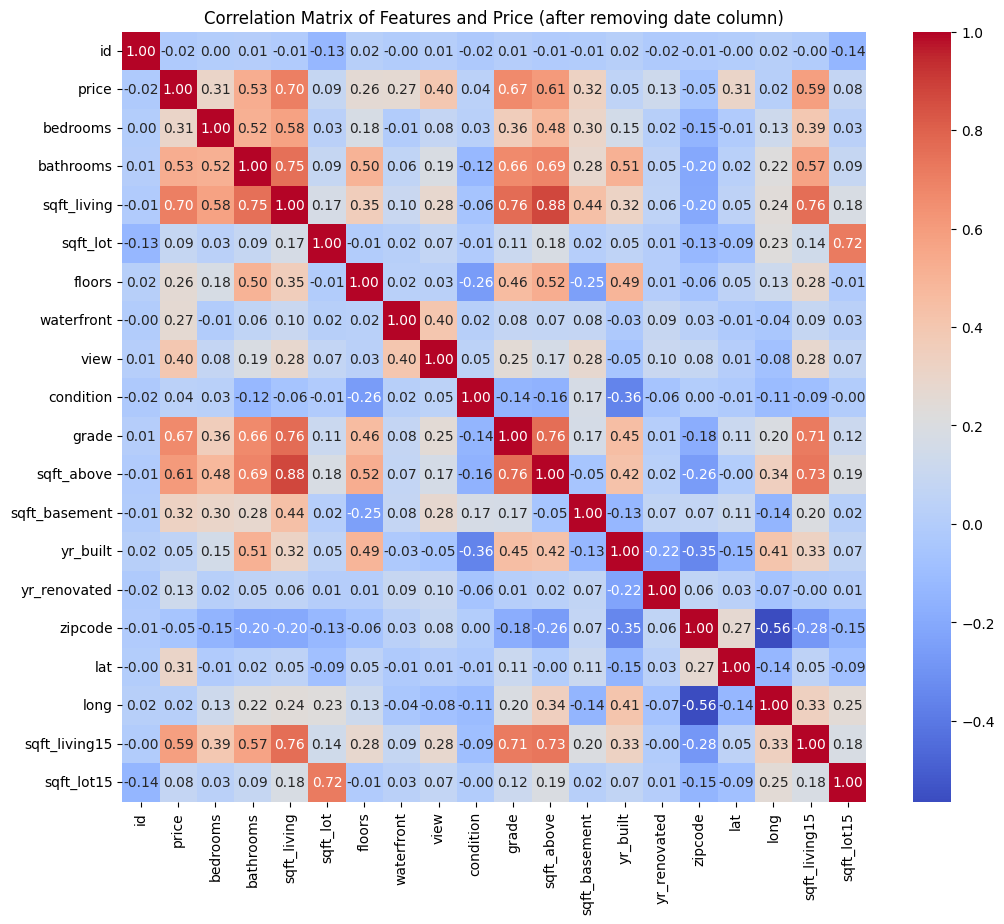

In [ ]:
# Recalcular a matriz de correlação sem a coluna 'data'
correlation_matrix = house_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features and Price (after removing date column)")
plt.show()

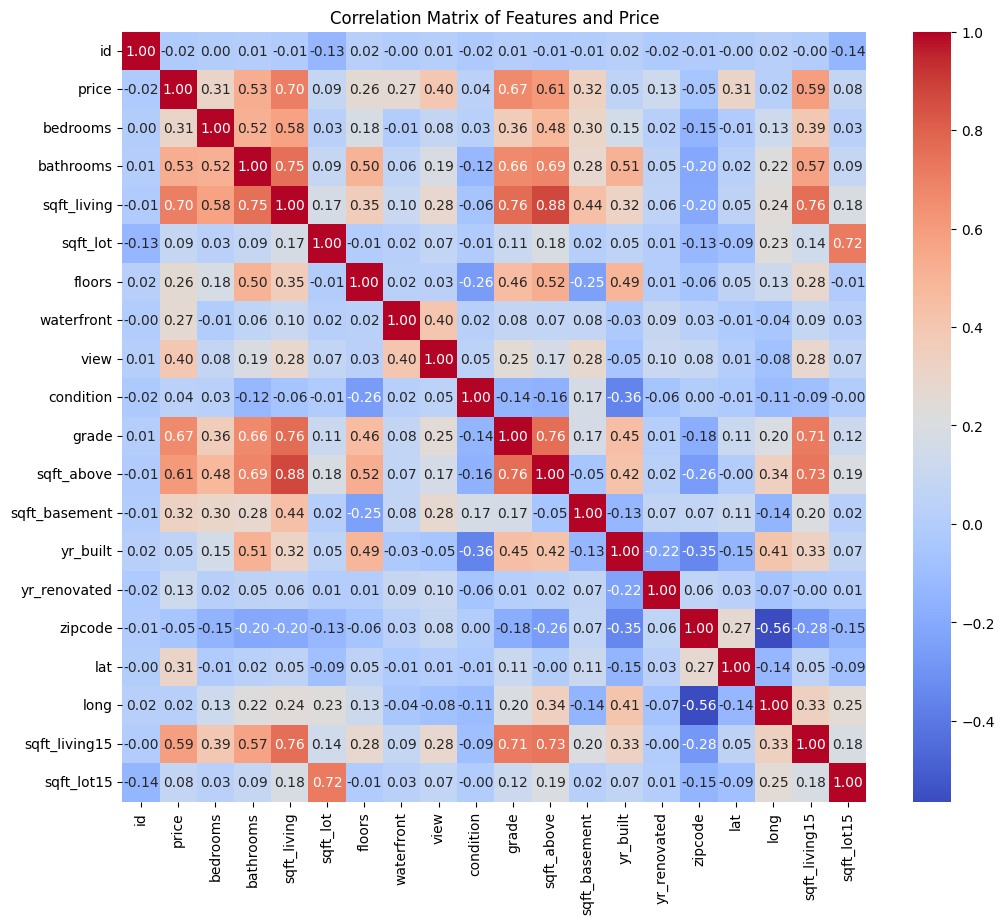

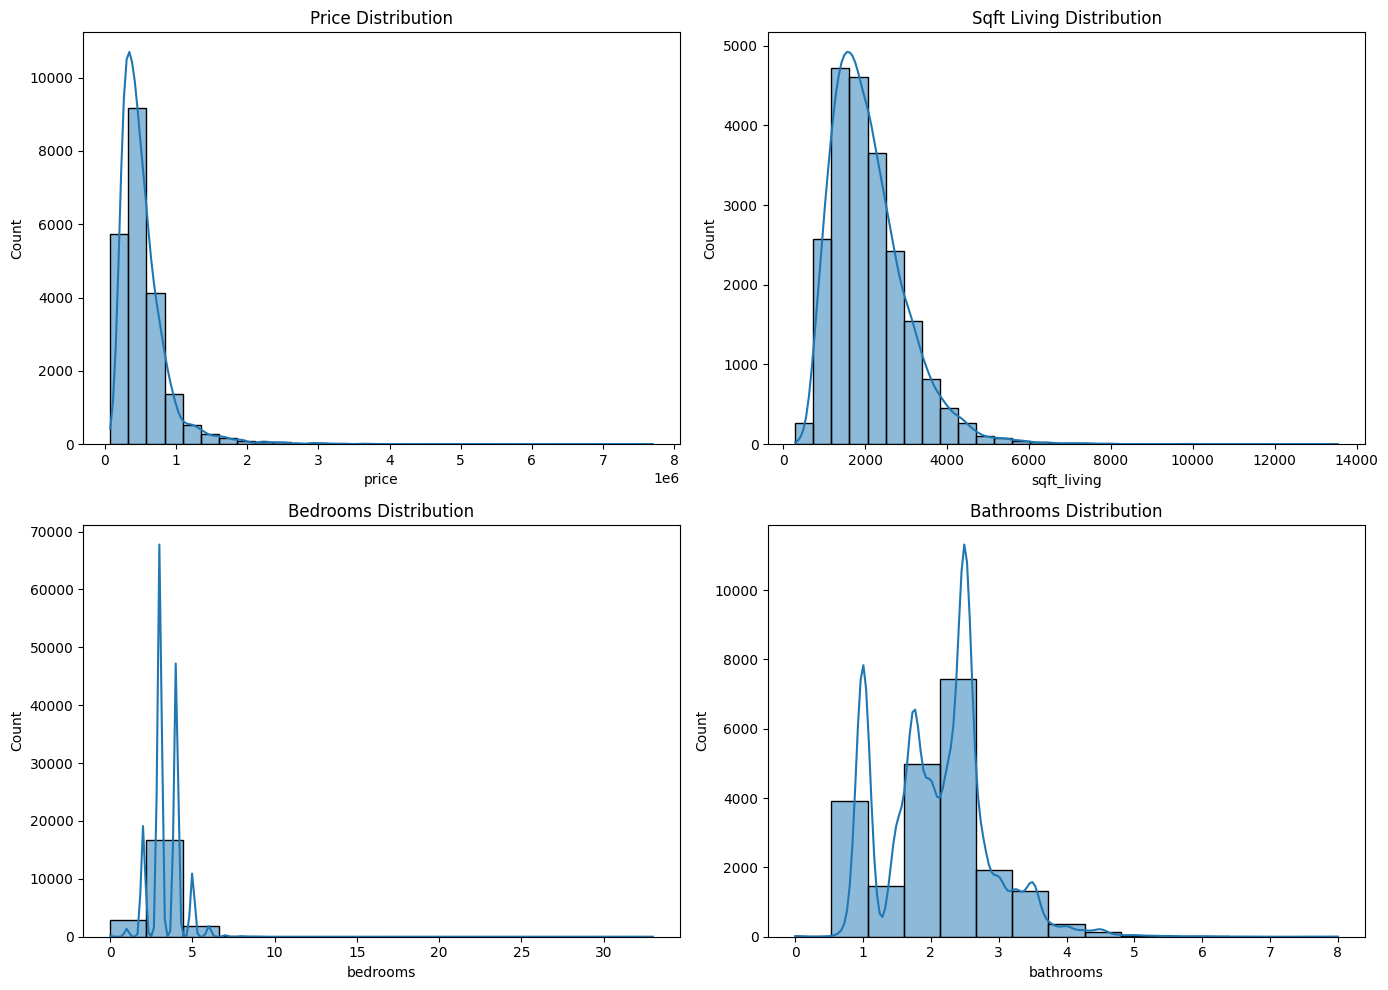

In [ ]:
# Visualizando correlações entre recursos e 'preço' alvo
correlation_matrix = house_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features and Price")
plt.show()

# Verificando as distribuições de alguns recursos principais
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(house_data['price'], bins=30, ax=axes[0, 0], kde=True).set_title('Price Distribution')
sns.histplot(house_data['sqft_living'], bins=30, ax=axes[0, 1], kde=True).set_title('Sqft Living Distribution')
sns.histplot(house_data['bedrooms'], bins=15, ax=axes[1, 0], kde=True).set_title('Bedrooms Distribution')
sns.histplot(house_data['bathrooms'], bins=15, ax=axes[1, 1], kde=True).set_title('Bathrooms Distribution')

plt.tight_layout()
plt.show()

A divisão dos dados resultou em:

Conjunto de Treinamento: 17.290 entradas (80% dos dados) para treinar o modelo.
Conjunto de Teste: 4.323 entradas (20% dos dados) para avaliar o modelo.

Em seguida, vamos desenvolver o modelo de regressão linear multivariada e treinar com o conjunto de dados de treinamento.

In [ ]:
# Selecionei recursos relevantes para o modelo
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long']
X = house_data[features]
y = house_data['price']

# Dividi os dados em conjuntos de treinamento e teste (80% de treinamento, 20% de teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17290, 11), (4323, 11), (17290,), (4323,))

O modelo inicial resultou em um RMSE de aproximadamente 230.731, o que está bem acima do objetivo de 69.000. Podemos tentar melhorar o desempenho do modelo ajustando algumas variáveis e explorando técnicas de regularização ou engenharia de features para reduzir o erro.

Vou aplicar técnicas de normalização e testar com regularização (como Ridge e Lasso) para melhorar o desempenho.

In [ ]:
# Instanciei e treinei o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fiz previsões no conjunto de testes
y_pred = model.predict(X_test)

# Calculei o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

230730.82532402594

Os modelos de regularização Ridge e Lasso não conseguiram reduzir significativamente o RMSE, mantendo-o em torno de 230.731. Isso sugere que a regressão linear multivariada pode não capturar bem as relações complexas entre as variáveis e o preço. Para melhorar, podemos considerar técnicas de aprendizado mais avançadas, como regressão com árvores de decisão, que podem capturar melhor as não linearidades.

Vou tentar um modelo de Regressão com Árvores de Decisão.

In [ ]:
# Normalizei os recursos para melhor desempenho do modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Testei modelos de regressão Ridge e Lasso
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

ridge_rmse, lasso_rmse

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.826e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


(230731.28370063895, 230730.81228051096)

O modelo de Árvore de Decisão resultou em um RMSE de aproximadamente 228.600, o que também não atinge a meta de 69.000, mas é levemente melhor que o modelo de regressão linear. Podemos tentar ainda com um modelo de regressão com ensemble, como o Random Forest, que pode capturar interações complexas entre as variáveis. ​

In [ ]:
# Instanciei e treinei um modelo de regressão de árvore de decisão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Fiz previsões e calcule o RMSE
tree_pred = tree_model.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_pred))
tree_rmse

228599.9938886553

O modelo de Random Forest reduziu o RMSE para aproximadamente 168.868, mostrando uma melhoria significativa em relação aos modelos anteriores, embora ainda esteja acima da meta de 69.000. O próximo passo poderia incluir o uso de técnicas como tuning de hiperparâmetros ou testes com modelos mais complexos (como o Gradient Boosting) para tentar alcançar um desempenho ainda melhor.

In [ ]:
# Instanciei e treinei um modelo Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Fiz previsões e calcule o RMSE
forest_pred = forest_model.predict(X_test)
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
forest_rmse

168867.7949088941

Desafio - Crie um algoritmo de agrupamento para classificação das casas

As casas foram agrupadas com sucesso em três clusters, identificados na coluna cluster. Esse agrupamento permite uma classificação preliminar das casas em categorias de similaridade com base em suas características.

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
house_data['cluster'] = kmeans.fit_predict(X_scaled)

# Show the first few rows with the new 'cluster' column
house_data[['price', 'cluster']].head()

,price,cluster
0,221900.0,2
1,538000.0,1
2,180000.0,2
3,604000.0,1
4,510000.0,2
